# Project: No show appointment for patients Data Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
● ‘Neighborhood’ indicates the
location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.
 


### Question(s) for Analysis
What factors are
important for us to
know in order to
predict if a patient will
show up for their
scheduled
appointment?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.9MB/s eta 0:00:01  3% |█                               | 348kB 21.5MB/s eta 0:00:01    14% |████▉                           | 1.6MB 24.6MB/s eta 0:00:01    28% |█████████▏                      | 3.0MB 28.7MB/s eta 0:00:01    42% |█████████████▌                  | 4.4MB 28.3MB/s eta 0:00:01    68% |██████████████████████          | 7.2MB 28.6MB/s eta 0:00:01    95% |██████████████████████████████▌ | 9.9MB 28.4MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.6MB/s eta 0:00:01   25% |████████▏                       | 3.4MB 27.3MB/s eta 0:00:01    35% |███████████▍                    | 4.8MB 27.5MB/s eta 0:00:01    75% |████████████████████████        | 10.1MB 24.5MB/s eta 0:00:01    85% |███████████████████████████▏    | 11.4MB 25.4MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      S

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [3]:
#load data
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [4]:
#exploring shape of data
df.shape

(110527, 14)

In [5]:
#explore the mean and counts and max and min 
df.describe()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

max age is 115 & min age is -1 & mean is 37

In [6]:
#check if there are any missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No missing values

In [7]:
#check for the rows which have age with -1
drp=df[df['Age']<0]
drp

TypeError: __init__() got an unexpected keyword argument 'max_rows'

          PatientId  AppointmentID Gender          ScheduledDay  \
99832  4.659432e+14        5775010      F  2016-06-06T08:58:13Z   

             AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
99832  2016-06-06T00:00:00Z   -1         ROMÃO            0             0   

       Diabetes  Alcoholism  Handcap  SMS_received No-show  
99832         0           0        0             0      No  


### Data Cleaning
 

In [8]:
# removing the age of -1
df.drop(index=99832,inplace=True)

In [9]:
df.duplicated(['PatientId','No-show']).sum()

38710

there is patients with same status of show with same patient id

In [10]:
df.drop_duplicates(['PatientId','No-show'], inplace=True)

removing duplicated patient id  with status of no show & show

In [11]:
df.dropna()
df.shape

(71816, 14)

In [12]:
df.describe()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

          PatientId  AppointmentID           Age   Scholarship  Hipertension  \
count  7.181600e+04   7.181600e+04  71816.000000  71816.000000  71816.000000   
mean   1.466249e+14   5.666493e+06     36.527501      0.095536      0.195068   
std    2.544917e+14   7.313083e+04     23.378262      0.293956      0.396256   
min    3.921784e+04   5.030230e+06      0.000000      0.000000      0.000000   
25%    4.175956e+12   5.631622e+06     17.000000      0.000000      0.000000   
50%    3.189425e+13   5.672882e+06     36.000000      0.000000      0.000000   
75%    9.457487e+13   5.716567e+06     55.000000      0.000000      0.000000   
max    9.999816e+14   5.790484e+06    115.000000      1.000000      1.000000   

           Diabetes    Alcoholism       Handcap  SMS_received  
count  71816.000000  71816.000000  71816.000000  71816.000000  
mean       0.070959      0.025036      0.020135      0.335566  
std        0.256758      0.156236      0.155338      0.472191  
min        0.000000    

In [13]:
#cleaning unnecessary data by remove columns
df.drop(['PatientId', 'AppointmentID','ScheduledDay','AppointmentDay'], axis = 1, inplace = True)

In [14]:
#edit column name
df.rename(columns = {'Hipertension' : 'hypertension'}, inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis

Now we are going to explore and visualize data after we wrangling and cleaning it 

## General Exploratory

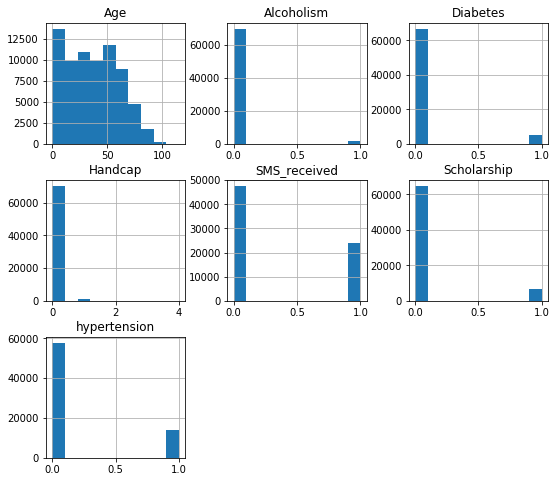

In [15]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(9,8));

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71816 entries, 0 to 110524
Data columns (total 10 columns):
Gender           71816 non-null object
Age              71816 non-null int64
Neighbourhood    71816 non-null object
Scholarship      71816 non-null int64
hypertension     71816 non-null int64
Diabetes         71816 non-null int64
Alcoholism       71816 non-null int64
Handcap          71816 non-null int64
SMS_received     71816 non-null int64
No-show          71816 non-null object
dtypes: int64(7), object(3)
memory usage: 6.0+ MB


In [17]:
#edit column name and counts no of show& no show
df.rename(columns = {'No-show' : 'No_show'}, inplace = True)
showing=df.No_show=='No'
no_showing=df.No_show=='Yes'
df.count(),df[showing].count(),df[no_showing].count()

(Gender           71816
 Age              71816
 Neighbourhood    71816
 Scholarship      71816
 hypertension     71816
 Diabetes         71816
 Alcoholism       71816
 Handcap          71816
 SMS_received     71816
 No_show          71816
 dtype: int64, Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64, Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

number of showing patients is 4 times than no showing patients

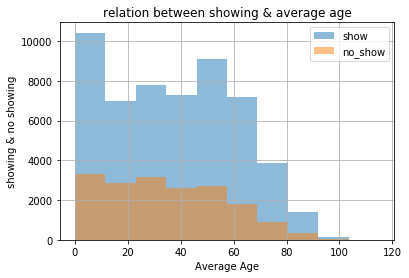

In [18]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
#relation between average age and no show
def attending(df,column_name,att,absent):
    
  #df[column_name][showing].mean()
  #df[column_name][no_showing].mean()
  df[column_name][showing].hist(alpha=0.5, bins=10, label='show')
  df[column_name][no_showing].hist(alpha=0.5, bins=10, label='no_show')
  plt.title('relation between showing & average age')
  plt.ylabel('showing & no showing');
  plt.xlabel('Average Age')
  plt.legend();
    
attending(df,'Age',showing,no_showing)

no of shpow patients are more than no_show patients in all ages

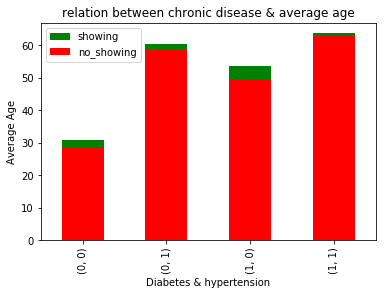

In [19]:
#relation between chronic diseases and average age according with no show
df[showing].groupby(['Diabetes','hypertension']).Age.mean().plot(kind= 'bar', color='green', label= 'showing');
df[no_showing].groupby(['Diabetes','hypertension']).Age.mean().plot(kind= 'bar', color='red', label= 'no_showing');
plt.title('relation between chronic disease & average age')
plt.xlabel('Diabetes & hypertension')
plt.ylabel('Average Age')
#df.Age[Diabetes][hypertension].hist(alpha=0.5, bins=15, label='showing')
#df.Age[Diabetes][hypertension].hist(alpha=0.5, bins=15, label='no_showing')
plt.legend();

chronic diseases existing don't affect attedance of patients

In [20]:
df[showing].mean(),df[no_showing].mean()

(Age             37.229166
 Scholarship      0.091334
 hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

average age of showing patients is 37 & average age of no_showing patients is 34

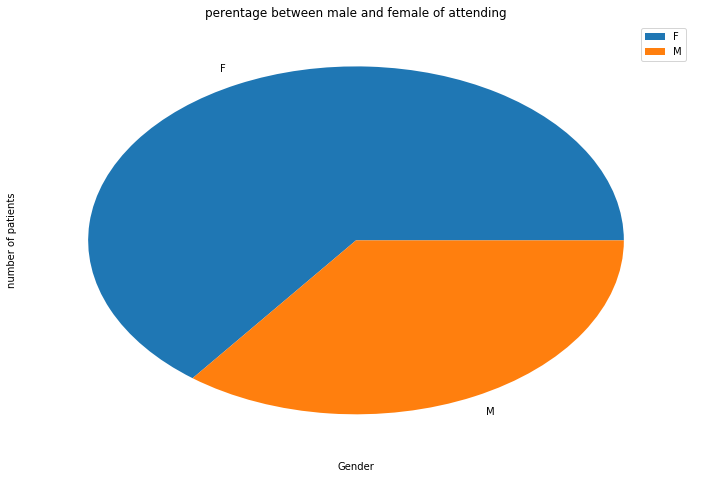

In [21]:
#how the gender affect no show?
plt.figure(figsize=[12,8])
df['Gender'][showing].value_counts().plot(kind='pie', label='show')
plt.title('perentage between male and female of attending')
plt.ylabel('number of patients')
plt.xlabel('Gender')
plt.legend();

percentage of gender attend

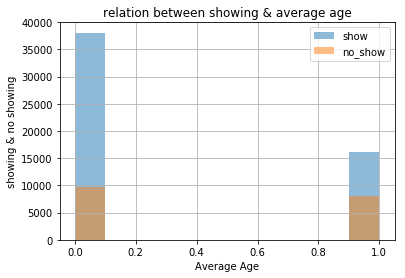

In [22]:
def attending(df,column_name,att,absent):
    
  #df[column_name][showing].mean()
  #df[column_name][no_showing].mean()
  df[column_name][showing].hist(alpha=0.5, bins=10, label='show')
  df[column_name][no_showing].hist(alpha=0.5, bins=10, label='no_show')
  plt.title('relation between showing & average age')
  plt.ylabel('showing & no showing');
  plt.xlabel('Average Age')
  plt.legend();
    
attending(df,'SMS_received',showing,no_showing)

people who didn't receive SmS are more attend than who received SmS

<a id='conclusions'></a>
## Conclusions

-we can see that the female show more than men
-we can see that the show people is more than no show
-we can see that the less the age the more show is
-we can see that according to chronic disease the show is more than no show
-age affect no of show as 0-10 the most number of show patients rather than the above 65 is the least no of patients show
## Limitations
there is not a correlation relation between show & age & chronic diseases & sex

## Submitting your Project 


In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0